# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#importing all the necessary libraries 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
#importing the dataset

In [5]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(32560, 15)

We can see that we have 32560 rows and 15 columns 

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Getting the overview of the dataset

In [8]:
df.count()

Age               32560
Workclass         32560
Fnlwgt            32560
Education         32560
Education_num     32560
Marital_status    32560
Occupation        32560
Relationship      32560
Race              32560
Sex               32560
Capital_gain      32560
Capital_loss      32560
Hours_per_week    32560
Native_country    32560
Income            32560
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


Now lets check if there is any null values 

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

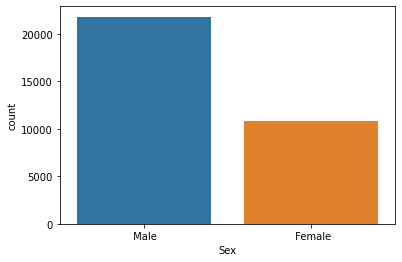

In [13]:
sns.countplot(df['Sex'])

There are more males as compare to females

<AxesSubplot:xlabel='Age'>

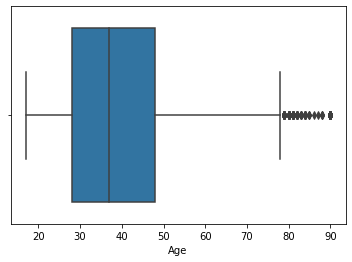

In [14]:
sns.boxplot(df['Age'])

Maximum number of people are in the age 25yrs old to 48 yrs old

<AxesSubplot:xlabel='Hours_per_week'>

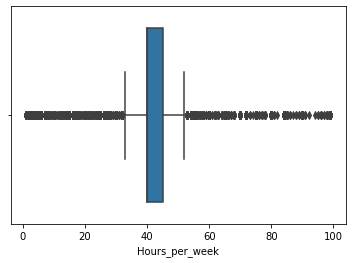

In [15]:
sns.boxplot(df['Hours_per_week'])

Average working hours per week is above 40 hours

<AxesSubplot:xlabel='Income', ylabel='count'>

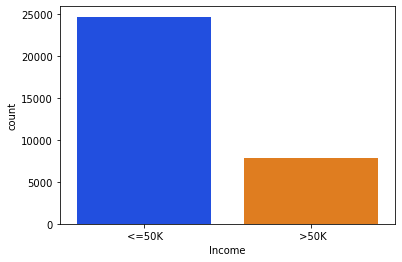

In [16]:
sns.countplot(df["Income"],palette="bright")

In [17]:
object_describe=df.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
Workclass,32560,9,Private,22696
Education,32560,16,HS-grad,10501
Marital_status,32560,7,Married-civ-spouse,14976
Occupation,32560,15,Prof-specialty,4140
Relationship,32560,6,Husband,13193
Race,32560,5,White,27815
Sex,32560,2,Male,21789
Native_country,32560,42,United-States,29169
Income,32560,2,<=50K,24719


# Data Cleaning

In [18]:
object_columns=df.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(df[object_columns[i]].value_counts()) 

----- Workclass-----
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----- Education-----
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
----- Marital_status-----
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
--

There are some missing values denoted with '?' so lets replace it NaN

In [19]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Now, lets fill the missing values 

In [20]:
null_columns =['Workclass','Occupation','Native_country']
for i in null_columns:
    df.fillna(df[i].mode()[0], inplace=True)

In [21]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [22]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [23]:
corr=df.corr()

<AxesSubplot:>

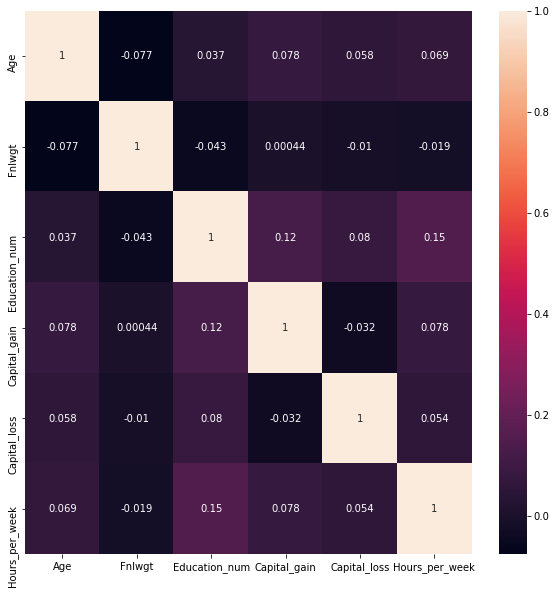

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='count', ylabel='Workclass'>

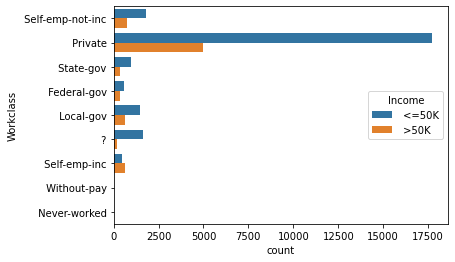

In [25]:
sns.countplot(y=df['Workclass'], hue=df['Income'])

From here we see that most of the people having salary less than 50k is from the private sector.

<AxesSubplot:xlabel='Sex', ylabel='count'>

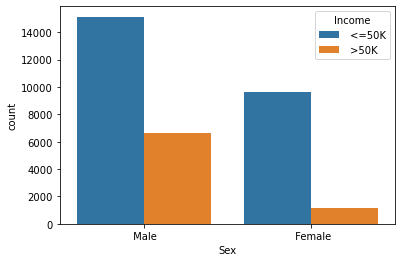

In [26]:
sns.countplot(df['Sex'], hue=df['Income'])

We see that most of the people working are having salary less than 50k.

<AxesSubplot:xlabel='Race', ylabel='count'>

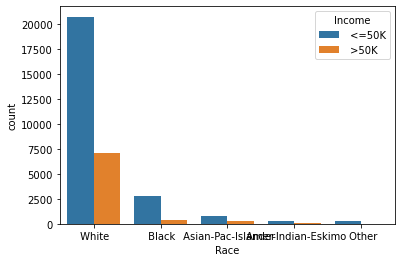

In [27]:
sns.countplot(x=df['Race'], hue=df['Income'])

<AxesSubplot:xlabel='count', ylabel='Education'>

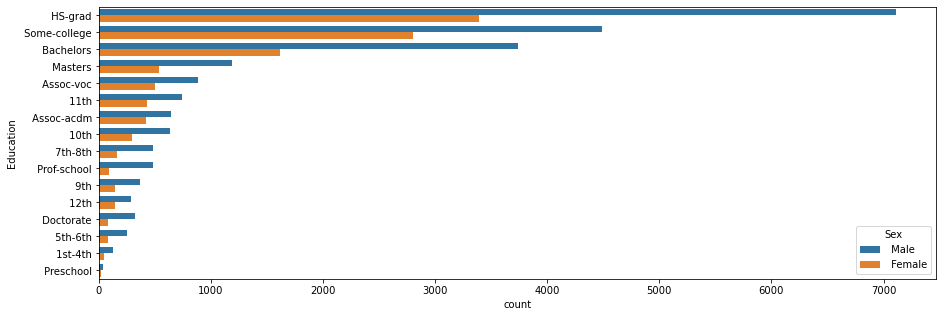

In [28]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['Education'], hue=df['Sex'], order = df['Education'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Relationship'>

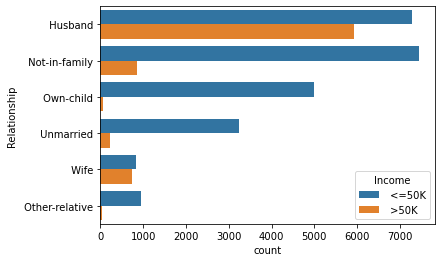

In [29]:
sns.countplot(y=df['Relationship'], hue=df['Income'], order = df['Relationship'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

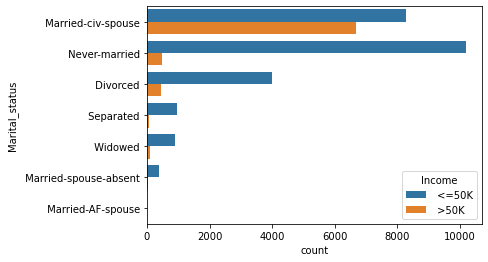

In [30]:
sns.countplot(y=df['Marital_status'], hue=df['Income'], order = df['Marital_status'].value_counts().index)

We see that most of the married people are earning more than 50k as compared to other classes

<AxesSubplot:xlabel='count', ylabel='Education'>

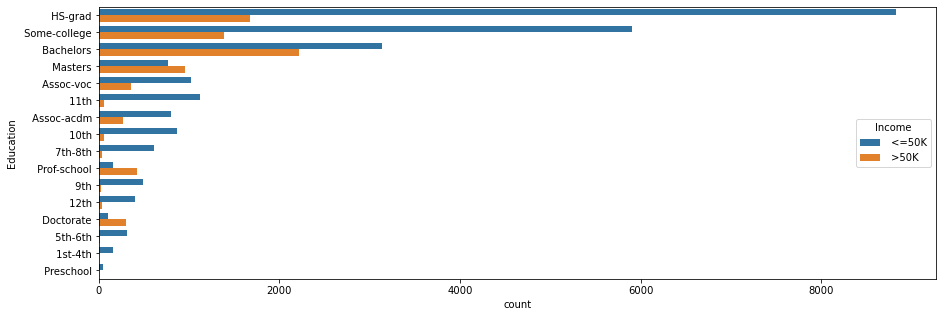

In [31]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['Education'], hue=df['Income'], order = df['Education'].value_counts().index)

CHECKING UNIQUE VALUES

In [32]:
print(df["Workclass"].unique())
print(df["Education"].unique())
print(df["Marital_status"].unique())
print(df["Occupation"].unique())
print(df["Relationship"].unique())
print(df["Race"].unique())
print(df["Sex"].unique())
print(df["Native_country"].unique())

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany'

As we have many unique values of native.country column so we will store its count in a dictonary and then map it on the dataset

In [33]:
native=df["Native_country"].value_counts().to_dict()

In [34]:
df["Native_country"]=df["Native_country"].map(native)

In [35]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,29169,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,29169,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,29169,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,95,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,29169,<=50K


# ENCODING CATEGORICAL VALUES

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
df_cols=("Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex")
for i in df_cols:
    df[i]=le.fit_transform(df[i])

In [38]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,29169,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,29169,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,29169,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,95,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,29169,<=50K


In [39]:
print(df["Workclass"].unique())
print(df["Education"].unique())
print(df["Marital_status"].unique())
print(df["Occupation"].unique())
print(df["Relationship"].unique())
print(df["Race"].unique())
print(df["Sex"].unique())

[6 4 7 1 2 0 5 8 3]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
[2 0 3 4 5 1 6]
[ 4  6 10  8  1 12  3 14  5  7 13  0 11  2  9]
[0 1 5 3 4 2]
[4 2 1 0 3]
[1 0]


# Splitting the Dataset into dependent and independent 

In [40]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Data training and testing 

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Training the dataset on logistic regression model

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 ...
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']]


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4738  219]
 [1136  419]]


0.7919226044226044

As we got a moderate accuracy so will try any other model to see if accuracy can increase

Training of the dataset on random forest classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier_2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred_2 = classifier_2.predict(X_test)
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1))

[[' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 ...
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']]


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_2)
print(cm)
accuracy_score(y_test, y_pred_2)

[[4621  336]
 [ 584  971]]


0.8587223587223587

Here we got an accuracy higher than logistic regression.